
## Backward error of the LU decomposition

## An almost backward error result

**Theorem**
Let the factorization $A=LU$ of a nonsingular matrix $A\in\mathbb{R}^{m\times m}$ be computed by Gaussian elimination without pivoting. If $A$ has an LU factorization, then for all sufficiently small $\epsilon_{mach}$, the factorization completes successfully in floating point arithmetic, and the computed matrices $\tilde{L}$ and $\tilde{U}$ satisfy

$$\tilde{L}\tilde{U} = A+\delta A,\quad \frac{\|\delta A\|}{\|L\|\|U\|} = \mathcal{O}(\epsilon_{mach})$$

for some $\delta A\in\mathbb{R}^{m\times m}$.

Does the above theorem tell us that LU decomposition is backward stable? No, it doesn't!! The crucial fact is that the error is measured relative to $\|L\|\|U\|$. But the backward error is a measure relative to $\|A\|$. Hence, backward stability follows only if $\|L\|\|U\|\approx \|A\|$.

Consider again the example with

$$
A_{\epsilon} = \begin{bmatrix}\epsilon & 1\\ 1 & 1\end{bmatrix}.
$$

We have
$$
A_{\epsilon} = \begin{bmatrix}1 & 0 \\ \epsilon^{-1} & 1\end{bmatrix}\begin{bmatrix}\epsilon & 1 \\ 0 & 1-\epsilon^{-1}\end{bmatrix}
$$

Hence, $\|L\|\|U\|\approx \epsilon^{-2}$ for very small $\epsilon$. But $\|A_\epsilon\|=\mathcal{O}(1)$, and we cannot expect backward stability. Indeed, we showed that for small $\epsilon$ the LU is not backward stable in this example.

## Growth Factors

**Definition (Growth factor)**
The growth factor $\rho$ is defined as the ratio
$$
\rho:=\frac{\max_{ij}|u_{ij}|}{\max_{ij}|a_{ij}|}.
$$

In Gaussian elimination with partial pivoting we have $\|L\| = \mathcal{O}(1)$ since $|\ell_{ij}|\leq 1$ for all multipliers $\ell_{ij}$. Hence, the main contribution to the product $\|L\|\|U\|$ is in $\|U\|$, which is measured by the growth factor. We obtain the following theorem


**Theorem (Backward stability of LU factorization)**
Let the factorization $PA=LU$ of a matrix $A\in\mathbb{R}^{m\times m}$ be computed by Gaussian elimination with partial pivoting. Then the computed matrices $\tilde{P}$, $\tilde{L}$, $\tilde{U}$ satisfy

$$
\tilde{L}\tilde{U}=\tilde{P}A+\delta A,\quad \frac{\|\delta A\|}{\|A\|}=\mathcal{O}(\rho\epsilon_{mach}).
$$
If $\ell_{ij}<1$ for each $i>j$ (there are no ties in the selection of pivots in exact arithmetic), then $\tilde{P}=P$ for all sufficiently small $\epsilon_{mach}$.

## Worst-Case Instability

In [1]:
import numpy as np

def matrix_with_large_rho(n):
    A = np.zeros((n,n),dtype=np.float64)
    for j in range(n-1):
        A += np.diag(-np.ones(n-1-j,dtype=np.float64),-j-1)
    A +=np.diag(np.ones(n,dtype=np.float64))
    A[:,-1]=np.ones(n)
    return A
print(matrix_with_large_rho(8))

[[ 1.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  0.  0.  0.  1.]
 [-1. -1.  1.  0.  0.  0.  0.  1.]
 [-1. -1. -1.  1.  0.  0.  0.  1.]
 [-1. -1. -1. -1.  1.  0.  0.  1.]
 [-1. -1. -1. -1. -1.  1.  0.  1.]
 [-1. -1. -1. -1. -1. -1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]


Its LU decomposition has the following shape

In [2]:
from scipy.linalg import lu
P,L,U=lu(matrix_with_large_rho(8))

In [3]:
print(U)

[[  1.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   1.   0.   0.   0.   0.   0.   2.]
 [  0.   0.   1.   0.   0.   0.   0.   4.]
 [  0.   0.   0.   1.   0.   0.   0.   8.]
 [  0.   0.   0.   0.   1.   0.   0.  16.]
 [  0.   0.   0.   0.   0.   1.   0.  32.]
 [  0.   0.   0.   0.   0.   0.   1.  64.]
 [  0.   0.   0.   0.   0.   0.   0. 128.]]


Let us plot the growth factor with respect to n.

Text(0, 0.5, 'rho')

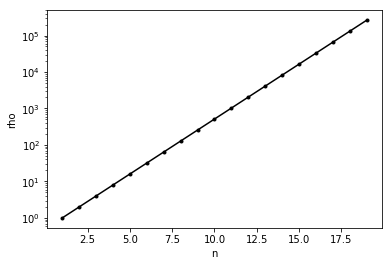

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
nvals = 1+np.arange(19)
rho_vals = np.zeros_like(nvals,dtype=np.float64)
for i,n in enumerate(nvals):
    P,L,U = lu(matrix_with_large_rho(n))
    rho_vals[i] = np.max(np.abs(U))
plt.semilogy(nvals,rho_vals,'k.-')
plt.xlabel('n')
plt.ylabel('rho')

The growth factor $\rho$ grows exponentially with $n$ for this matrix. What is the effect on the backward error for solving a linear system of equations?

In [5]:
n = 100
A = matrix_with_large_rho(n)
b = np.random.rand(n)
x = np.linalg.solve(A,b)
print(np.linalg.norm(np.dot(A,x)-b)/(np.linalg.norm(A)*np.linalg.norm(x)))

0.0836122648719776


**Gaussian elimination with partial pivoting is not backward stable.**

## Growth factor of random matrices

The following plot shows the probability density functions for the growth factor $\rho$ for matrices of dimension $8$, $16$, and $32$ (see [Driscoll, Maki '07](http://www.math.udel.edu/~driscoll/papers/2007-DriscollMaki-673.pdf)). It shows that large growth factors are exponentially unlikely to occur randomly. Indeed, essentially no practical application is known, where growth factors cause difficulties. Hence, **in practice Gaussian elimination with partial pivoting is backward stable**.

<img src="./growth_factors.png">